In [9]:
import os
import random

data_path = "/home/myeghiaz/Storage/Datasets/LINZ-Real/GSD:0.250m_sample-size:384"
anns_path = os.path.join(data_path, "annotations")
imgs_path = os.path.join(data_path, "images")

anns = os.listdir(anns_path)
imgs = os.listdir(imgs_path)

In [10]:
# Pick a single/random sample from the data set to visualize it
pick_random = False
# sample_name = random.choice(anns).split('.')[0] if pick_random else "0003_0002_0003398"
sample_name = random.choice(anns).split('.')[0] if pick_random else "0003_0002_0003398"
print(f"Selected {sample_name}")
anns_file = os.path.join(anns_path, sample_name + '.pkl')
img_file = os.path.join(imgs_path, sample_name + '.jpg')

# We check that both files actually exist
print(os.path.isfile(anns_file))
print(os.path.isfile(img_file))

Selected 0003_0002_0003398
True
True


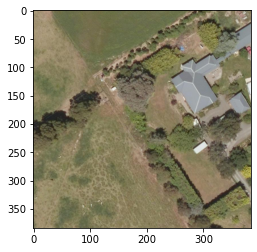

In [11]:
import cv2
from matplotlib import pyplot as plt

# Visualize the image
image = cv2.imread(img_file)
image = image[...,::-1]
plt.imshow(image)

{'van_rv': array([[288.6646833 , 202.04684041]]), 'unknown': array([], shape=(0, 2), dtype=float64), 'truck': array([], shape=(0, 2), dtype=float64), 'bus': array([], shape=(0, 2), dtype=float64), 'trailer_small': array([[383.74980962, 137.36246245]]), 'specialized': array([], shape=(0, 2), dtype=float64), 'trailer_large': array([], shape=(0, 2), dtype=float64), 'small': array([[383.14293578,  72.88082395]])}
Total number of detections in the image: 3


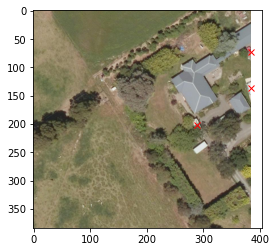

In [12]:
import pickle

with open(anns_file, 'rb') as f:
    annotations = pickle.load(f)

# print(annotations.keys())
print(annotations)

# Collect the annotations
detections_x = []
detections_y = []
k = 0
for category in annotations.keys():
    detections = annotations[category]
    for detection in detections:
        detections_x.append(detection[0])
        detections_y.append(detection[1])
        k += 1
print(f"Total number of detections in the image: {k}")

# Plot the image with the ground-truth labels
plt.imshow(image)
plt.plot(detections_x, detections_y, 'rx')